In [678]:
#Import packages

import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import pylab as py

# Comment this if the data visualisations doesn't work on your side
%matplotlib inline

plt.style.use('bmh')

pd.set_option('display.max_rows', 500)

In [679]:
#Load the dataset into a dataframe

train = pd.read_csv('/Users/Jai/Desktop/All_files/MS_in_DS/Machine_learning/Module1/house-prices-advanced-regression-techniques/train.csv')
test = pd.read_csv('/Users/Jai/Desktop/All_files/MS_in_DS/Machine_learning/Module1/house-prices-advanced-regression-techniques/test.csv')


In [571]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [572]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [680]:
#Sample view
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# Provide appropriate descriptive statistics and visualizations to help understand the marginal distribution of the dependent variable.

In [574]:
#Check how the Sale Price(dependent variable) is distributed.
print(train['SalePrice'].describe())

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


/Users/Jai/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


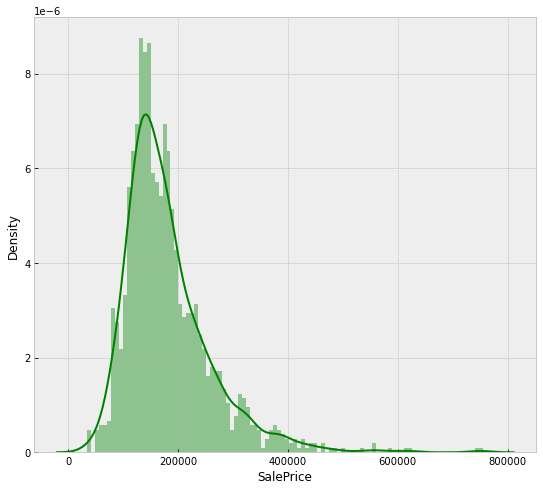

In [575]:
#Plot the SalePrice data using density curve
plt.figure(figsize=(9, 8))
sns.distplot(train['SalePrice'], color='g', bins=100, hist_kws={'alpha': 0.4});

Findings: Based on this data, we can observe that the prices are positively skewed, indicating that there are some unusually high values above 500,000. To achieve a normal distribution of the independent variable (SalePrice) for machine learning purposes, it would be necessary to eventually remove these outliers.

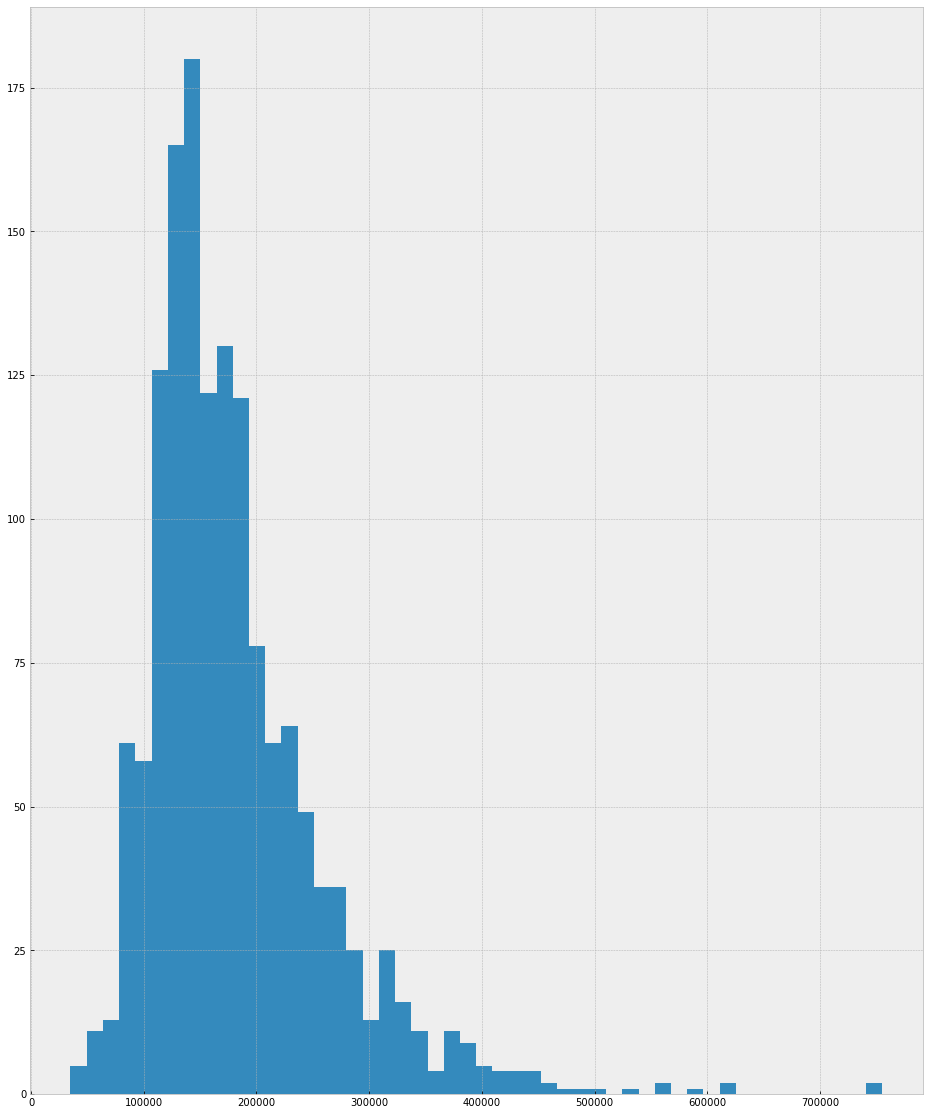

In [576]:
#Plot SalePrice using a histogram
train['SalePrice'].hist(figsize=(16, 20), bins=50, xlabelsize=10, ylabelsize=10);



Findings: Majority of the house sale price range between 100,000 and 200,000. There are few houses with prices ranging from 500K to 700K and above. These can potentially be discarded from the model since there's very less data in these ranges.

[]

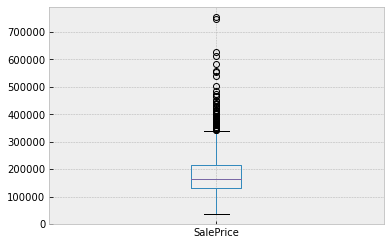

In [577]:
#Box plot of SalePrice
b_plot = train.boxplot(column = 'SalePrice') 
b_plot.plot()

Findings: In the above box plot, it is further clear that there are outliers in the data above 500K range. The 25th percentile is around 130K, 75th percentile is close to 210K and the median is around 150K. Most of the data points fall between 0 to 350K sice the whiskers of the box tend to be between that range. The data seems to be skewed to the right since the majority of the observation cluster towards the lower side and there is a long tail.

# Investigate missing data and outliers.

In [578]:
#Get number of rows of missing data in each field using isnull.
missing_data = train.isnull().sum()
missing_data.sort_values(ascending=False)


PoolQC           1453
MiscFeature      1406
Alley            1369
Fence            1179
FireplaceQu       690
LotFrontage       259
GarageYrBlt        81
GarageCond         81
GarageType         81
GarageFinish       81
GarageQual         81
BsmtFinType2       38
BsmtExposure       38
BsmtQual           37
BsmtCond           37
BsmtFinType1       37
MasVnrArea          8
MasVnrType          8
Electrical          1
Id                  0
Functional          0
Fireplaces          0
KitchenQual         0
KitchenAbvGr        0
BedroomAbvGr        0
HalfBath            0
FullBath            0
BsmtHalfBath        0
TotRmsAbvGrd        0
GarageCars          0
GrLivArea           0
GarageArea          0
PavedDrive          0
WoodDeckSF          0
OpenPorchSF         0
EnclosedPorch       0
3SsnPorch           0
ScreenPorch         0
PoolArea            0
MiscVal             0
MoSold              0
YrSold              0
SaleType            0
SaleCondition       0
BsmtFullBath        0
HeatingQC 

In [579]:
train['LotFrontage'].value_counts()

60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
65.0      44
85.0      40
78.0      25
21.0      23
90.0      23
68.0      19
64.0      19
24.0      19
73.0      18
55.0      17
63.0      17
79.0      17
72.0      17
100.0     16
66.0      15
74.0      15
51.0      15
52.0      14
59.0      13
82.0      12
71.0      12
67.0      12
43.0      12
40.0      12
57.0      12
76.0      11
69.0      11
92.0      10
34.0      10
53.0      10
86.0      10
88.0      10
84.0       9
35.0       9
62.0       9
44.0       9
77.0       9
93.0       8
98.0       8
96.0       8
61.0       8
95.0       7
58.0       7
120.0      7
107.0      7
94.0       6
81.0       6
36.0       6
30.0       6
48.0       6
91.0       6
41.0       6
54.0       6
89.0       6
110.0      6
105.0      6
32.0       5
47.0       5
87.0       5
56.0       5
37.0       5
83.0       5
102.0      4
42.0       4
49.0       4
104.0      3
103.0      3
99.0       3
45.0       3
108.0      3
130.0      3
124.0      2

Findings: There are 19 fields in the data having null values.Majority of the missing values seem to be in PoolQC, MiscFeature, Alley and Fence which have missing data > 1000 rows. 

# Investigate at least three potential predictors of the dependent variable and provide appropriate graphs / statistics to demonstrate the relationships.

In [580]:
#Find features strongly correlated with SalePrice using corr() function
df_corr =train.corr()['SalePrice'][:-1] # -1 because the latest row is SalePrice
golden_features_list = df_corr[abs(df_corr) > 0.5].sort_values(ascending=False)
print("There is {} strongly correlated values with SalePrice:\n{}".format(len(golden_features_list), golden_features_list))

There is 10 strongly correlated values with SalePrice:
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
Name: SalePrice, dtype: float64


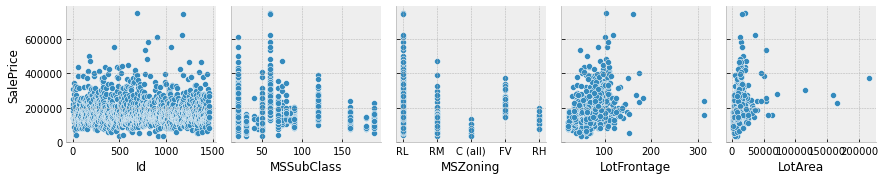

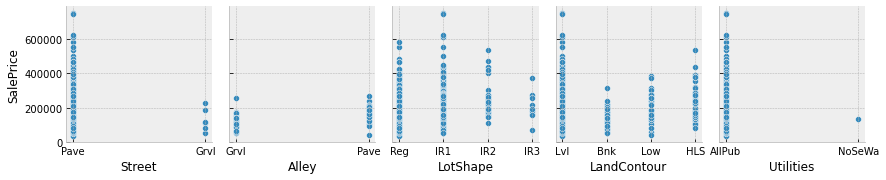

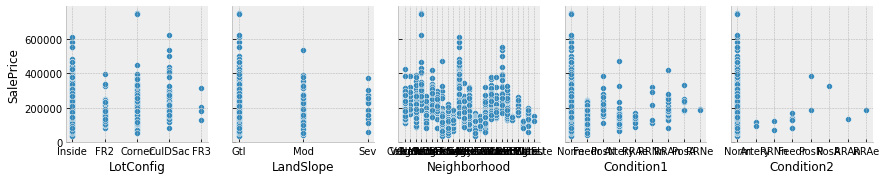

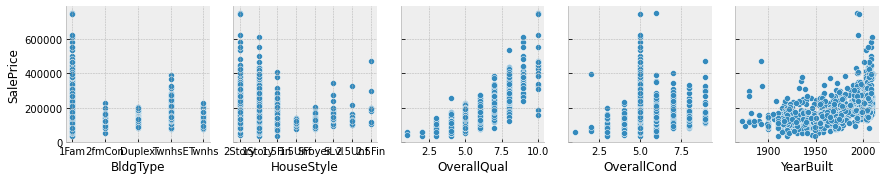

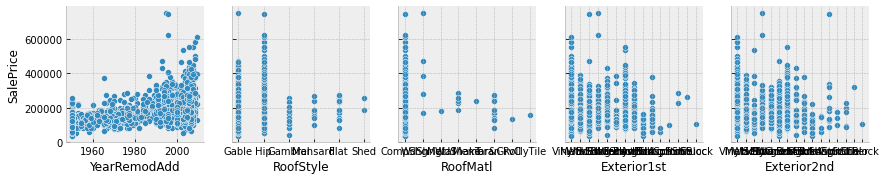

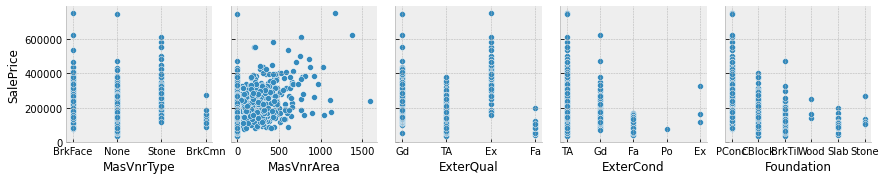

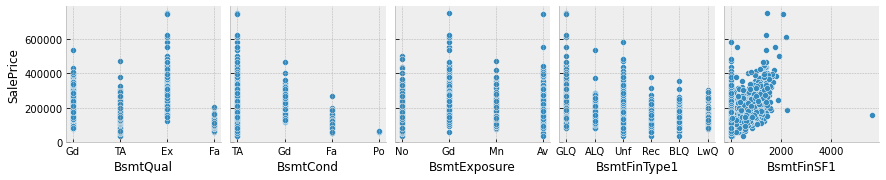

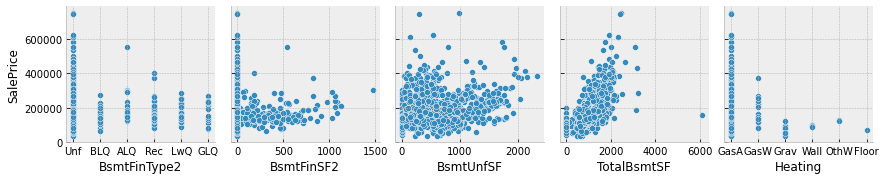

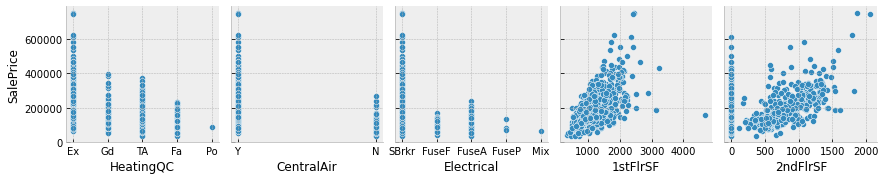

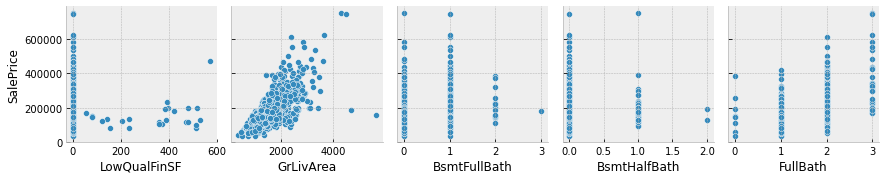

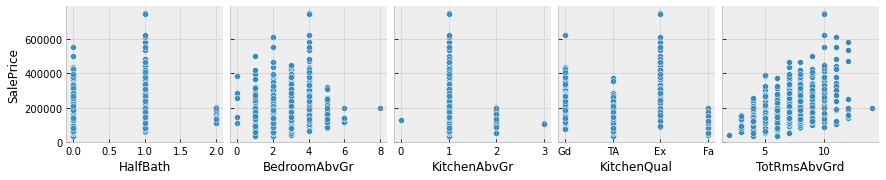

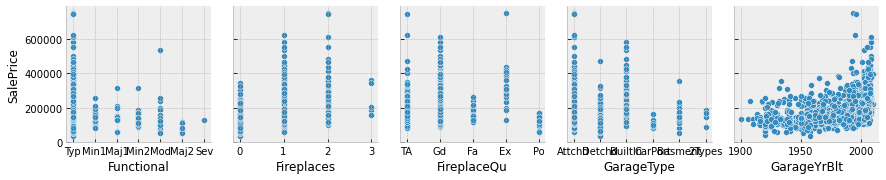

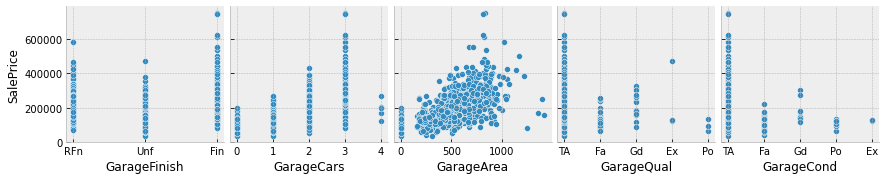

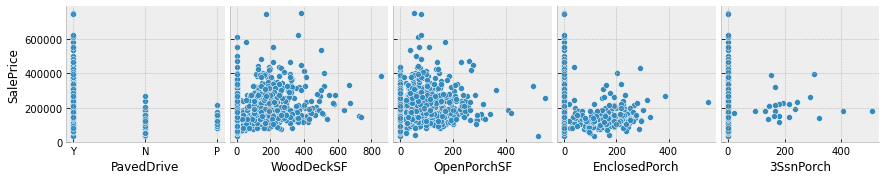

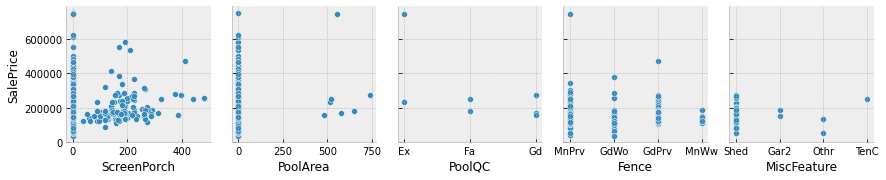

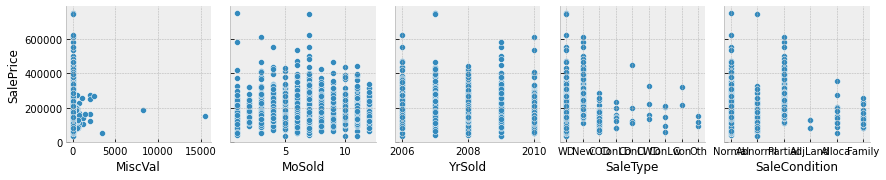

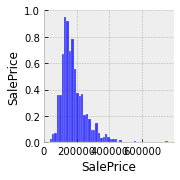

In [581]:
#Pair plots to check if there are linear relationships between other columns and SalePrice
for i in range(0, len(train.columns), 5):
    sns.pairplot(data=train,
                x_vars=train.columns[i:i+5],
                y_vars=['SalePrice'])

In [582]:
#get correlations of all independent variables to the dependent variable
import operator
individual_features_df = []
for i in range(0, len(train.columns) - 1): # -1 because the last column is SalePrice
    tmpDf = train[[train.columns[i], 'SalePrice']]
    tmpDf = tmpDf[tmpDf[train.columns[i]] != 0]
    individual_features_df.append(tmpDf)

all_correlations = {feature.columns[0]: feature.corr()['SalePrice'][0] for feature in individual_features_df}
all_correlations = sorted(all_correlations.items(), key=operator.itemgetter(1))
for (key, value) in all_correlations:
    print("{:>15}: {:>15}".format(key, value))

   KitchenAbvGr: -0.1392006921778576
       HalfBath: -0.08439171127179902
     MSSubClass: -0.08428413512659509
    OverallCond: -0.07785589404867797
         YrSold: -0.028922585168736813
   BsmtHalfBath: -0.02883456718548182
             Id: -0.021916719443430967
       PoolArea: -0.014091521506356765
   BsmtFullBath: 0.011439163340408606
         MoSold: 0.046432245223819446
      3SsnPorch: 0.06393243256889088
    OpenPorchSF: 0.08645298857147718
        MiscVal: 0.08896338917298921
     Fireplaces: 0.12166058421363891
      BsmtUnfSF: 0.16926100049514173
   BedroomAbvGr: 0.18093669310848806
     WoodDeckSF: 0.1937060123752066
     BsmtFinSF2: 0.19895609430836594
  EnclosedPorch: 0.24127883630117497
    ScreenPorch: 0.2554300795487841
        LotArea: 0.2638433538714051
   LowQualFinSF: 0.30007501655501323
    LotFrontage: 0.35179909657067737
     MasVnrArea: 0.43409021975689227
     BsmtFinSF1: 0.47169042652357296
    GarageYrBlt: 0.4863616774878596
   YearRemodAdd: 0.50710096711

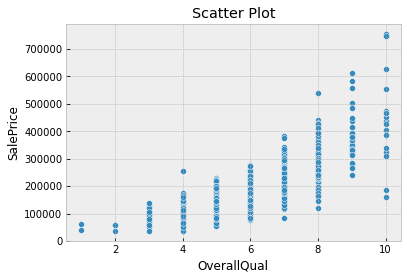

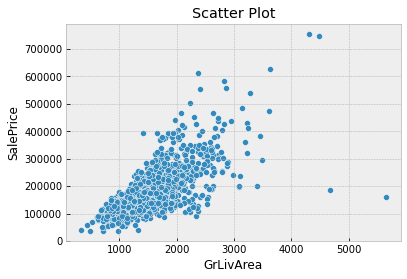

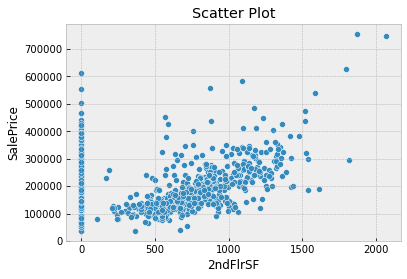

In [583]:
#I chose 3 variables due to its high correlation coefficients - OverallQual,
#GrLivArea,2ndFlrSF
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame, 'x' is the predictor, and 'y' is the dependent variable
#Overall material and finish of the house and SalePrice
sns.scatterplot(data=train, x='OverallQual', y='SalePrice')
plt.title('Scatter Plot')
plt.show()

#Ground floor living area and SalePrice
sns.scatterplot(data=train, x='GrLivArea', y='SalePrice')
plt.title('Scatter Plot')
plt.show()

#2nd floor square feet and SalePrice
sns.scatterplot(data=train, x='2ndFlrSF', y='SalePrice')
plt.title('Scatter Plot')
plt.show()




Findings: Overall these three predictors OverallQual,GrLivArea and 2ndFlrSF seem to have a linear relationship with the dependent variable based on the scatterplots.

In [584]:
from scipy.stats import pearsonr

#Check pearson correlation coefficient of Overall quality of material and finishings
#vs SalePrice
# Assuming 'x' and 'y' are your continuous variables
corr, p_value = pearsonr(train['SalePrice'], train['OverallQual'])

print("Pearson correlation coefficient:", corr)
print("p-value:", p_value)

Pearson correlation coefficient: 0.7909816005838048
p-value: 2.185675268e-313


In [585]:
from scipy.stats import pearsonr

#Check Pearson correlation coefficient of Ground floor living area and SalePrice
# Assuming 'x' and 'y' are your continuous variables
corr, p_value = pearsonr(train['SalePrice'], train['GrLivArea'])

print("Pearson correlation coefficient:", corr)
print("p-value:", p_value)

Pearson correlation coefficient: 0.708624477612652
p-value: 4.518033646780971e-223


In [586]:
from scipy.stats import pearsonr

#Check Pearson correlation coefficient of 2nd floor square feet and SalePrice
# Assuming 'x' and 'y' are your continuous variables
corr, p_value = pearsonr(df['SalePrice'], df['2ndFlrSF'])

print("Pearson correlation coefficient:", corr)
print("p-value:", p_value)

Pearson correlation coefficient: 0.31933380283206786
p-value: 5.764335119183061e-36


Findings: Overall the correlation coefficients indicates a strong positive linear relationship between the 3 independent and dependent variable - SalePrice.
The OverallQual variable seems to have the most positive relationship with SalePrice since it has the highest the correlation coefficient compared to the other two variables. Also, the p-value of p-values of all variables is very close to zero and  it provides strong evidence to reject the null hypothesis of no correlation. Therefore, it suggests that there is a statistically significant linear relationship between the variables.

# Engage in feature creation by splitting, merging, or otherwise generating a new predictor.

In [587]:
#Extract all object types to a dataframe called df_not_num. This dataframe will contain all the categorical variables in the data
df_not_num = train.select_dtypes(include = ['O'])
print('There is {} non numerical features including:\n{}'.format(len(df_not_num.columns), df_not_num.columns.tolist()))

There is 43 non numerical features including:
['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


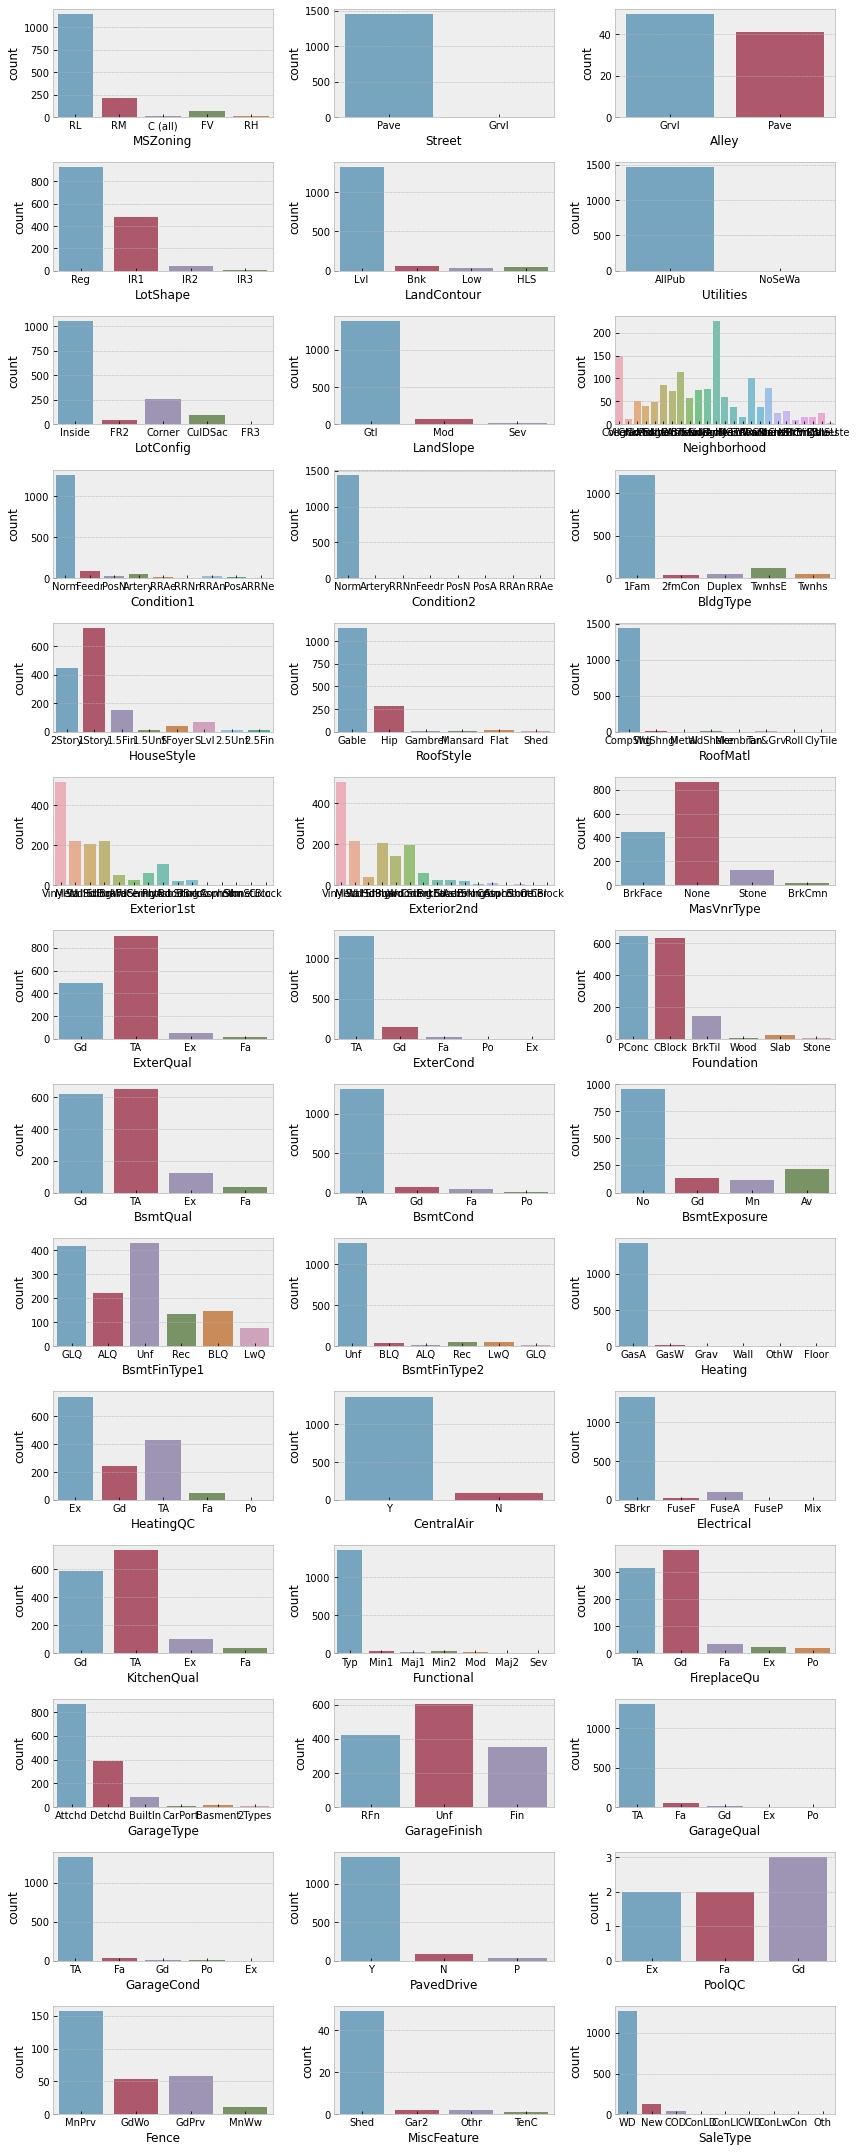

In [588]:
#Create sub plots for each categorical variable to see count distributions of all categorical values
fig, axes = plt.subplots(round(len(df_not_num.columns) / 3), 3, figsize=(12, 30))

for i, ax in enumerate(fig.axes):
    if i < len(df_not_num.columns):
        #ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45)
        ax.tick_params
        sns.countplot(x=df_not_num.columns[i], alpha=0.7, data=df_not_num, ax=ax)

fig.tight_layout()

In [589]:
#Create another variable called HasPool which differentiates houses with and without a pool. If the house has a pool 
#then encode as 1 else 0.
train['HasPool'] = train['PoolArea'].apply(lambda x: 1 if x > 0 else 0)
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,HasPool
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2008,WD,Normal,208500,0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,5,2007,WD,Normal,181500,0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,9,2008,WD,Normal,223500,0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000,0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,12,2008,WD,Normal,250000,0


In [590]:
#Check the count of houses having a pool vs not having a pool
train['HasPool'].value_counts()

0    1453
1       7
Name: HasPool, dtype: int64

In [591]:
#Pull details of houses having a pool in their yard
filtered_df = train[train['HasPool'] == 1]

# Display the filtered rows
print(filtered_df)

        Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
197    198          75       RL        174.0    25419   Pave   NaN      Reg   
810    811          20       RL         78.0    10140   Pave   NaN      Reg   
1170  1171          80       RL         76.0     9880   Pave   NaN      Reg   
1182  1183          60       RL        160.0    15623   Pave   NaN      IR1   
1298  1299          60       RL        313.0    63887   Pave   NaN      IR3   
1386  1387          60       RL         80.0    16692   Pave   NaN      IR1   
1423  1424          80       RL          NaN    19690   Pave   NaN      IR1   

     LandContour Utilities  ... PoolQC  Fence MiscFeature MiscVal MoSold  \
197          Lvl    AllPub  ...     Ex  GdPrv         NaN       0      3   
810          Lvl    AllPub  ...     Fa  GdPrv         NaN       0      1   
1170         Lvl    AllPub  ...     Gd  GdPrv         NaN       0      7   
1182         Lvl    AllPub  ...     Ex  MnPrv         NaN      

Findings: It looks like a lot of houses do not have pools. Only 7 out of 1460 houses have pools and the rest do not.There is 1 house priced at 745K with an abnormal sale condition. The rest of the house sales seem to be between the range of 160K and 275K. 


# Using the dependent variable, perform both min-max and standard scaling in Python.

In [592]:

from sklearn.preprocessing import MinMaxScaler, StandardScaler
import pandas as pd

# Assuming 'df' is your DataFrame and 'dependent_variable' is the column name of the dependent variable
dependent_variable = df['SalePrice'].values.reshape(-1, 1)  # Reshape to a 2D array

# Min-Max Scaling
min_max_scaler = MinMaxScaler()
min_max_scaled = min_max_scaler.fit_transform(dependent_variable)

# Standard Scaling
standard_scaler = StandardScaler()
standard_scaled = standard_scaler.fit_transform(dependent_variable)

# Convert the scaled arrays back to a DataFrame (if needed)
min_max_scaled_df = pd.DataFrame(min_max_scaled, columns=['scaled_dependent_variable'])
standard_scaled_df = pd.DataFrame(standard_scaled, columns=['scaled_dependent_variable'])

In [593]:
#min_max_scaled_df

sorted_df = min_max_scaled_df.sort_values('scaled_dependent_variable', ascending=False)
sorted_df


,scaled_dependent_variable
691,1.000000
1182,0.986113
1169,0.819470
898,0.800940
803,0.761051
...,...
30,0.007082
533,0.006110
968,0.004166
916,0.000571


In [231]:
sorted_df = standard_scaled_df.sort_values('scaled_dependent_variable', ascending=False)
sorted_df

,scaled_dependent_variable
691,7.228819
1182,7.102899
1169,5.591855
898,5.423840
803,5.062146
...,...
30,-1.774484
533,-1.783299
968,-1.800928
916,-1.833528


# Conduct Cross Validation Design

In [622]:
#place all categorical columns in a list
train_categorical_columns = train.select_dtypes(include=['object']).columns
#convert categorical columns to string
#train[categorical_columns] = train[categorical_columns].astype(str)
test_categorical_columns = test.select_dtypes(include=['object']).columns

43


In [623]:
#place all continuous columns in a list
train_continuous_columns = train.select_dtypes(exclude='object').columns
test_continuous_columns = test.select_dtypes(exclude='object').columns



38


In [625]:
#Count of missing values in continuous columns in train set
train[train_continuous_columns].isnull().sum().sort_values(ascending=False)[:10]

LotFrontage     259
GarageYrBlt      81
MasVnrArea        8
Id                0
OpenPorchSF       0
KitchenAbvGr      0
TotRmsAbvGrd      0
Fireplaces        0
GarageCars        0
GarageArea        0
dtype: int64

In [626]:
#Percent of null values in first 10 continuous columns in train set
train[train_continuous_columns].isnull().sum().sort_values(ascending=False)[:10]/len(train[train_continuous_columns])

LotFrontage     0.177397
GarageYrBlt     0.055479
MasVnrArea      0.005479
Id              0.000000
OpenPorchSF     0.000000
KitchenAbvGr    0.000000
TotRmsAbvGrd    0.000000
Fireplaces      0.000000
GarageCars      0.000000
GarageArea      0.000000
dtype: float64

In [627]:
#Fill with mean 
train['LotFrontage'].fillna(train['LotFrontage'].mean(),inplace=True)
train['GarageYrBlt'].fillna(train['GarageYrBlt'].mean(),inplace=True)
train['MasVnrArea'].fillna(train['MasVnrArea'].mean(),inplace=True)



In [628]:
#Count of missing values in continuous columns in test
test[test_continuous_columns].isnull().sum().sort_values(ascending=False)[:10]

LotFrontage     227
GarageYrBlt      78
MasVnrArea       15
BsmtHalfBath      2
BsmtFullBath      2
BsmtFinSF2        1
GarageCars        1
GarageArea        1
TotalBsmtSF       1
BsmtUnfSF         1
dtype: int64

In [629]:
#Percent of null values in first 10 continuous columns in test set
test[test_continuous_columns].isnull().sum().sort_values(ascending=False)[:10]/len(test[test_continuous_columns])

LotFrontage     0.155586
GarageYrBlt     0.053461
MasVnrArea      0.010281
BsmtHalfBath    0.001371
BsmtFullBath    0.001371
BsmtFinSF2      0.000685
GarageCars      0.000685
GarageArea      0.000685
TotalBsmtSF     0.000685
BsmtUnfSF       0.000685
dtype: float64

In [630]:
#Fill with mean in continuous columns in test
test['BsmtHalfBath'].fillna(test['BsmtHalfBath'].mean(),inplace=True)
test['BsmtFullBath'].fillna(test['GarageYrBlt'].mean(),inplace=True)
test['BsmtFinSF1'].fillna(test['BsmtFinSF1'].mean(),inplace=True)
test['GarageCars'].fillna(test['GarageCars'].mean(),inplace=True)
test['GarageArea'].fillna(test['GarageArea'].mean(),inplace=True)
test['TotalBsmtSF'].fillna(test['TotalBsmtSF'].mean(),inplace=True)
test['BsmtUnfSF'].fillna(test['BsmtUnfSF'].mean(),inplace=True)
test['BsmtFinSF2'].fillna(test['BsmtFinSF2'].mean(),inplace=True)

In [631]:
#Fill missing values with mean in train set
train['LotFrontage'].fillna(train['LotFrontage'].mean(),inplace=True)
train['GarageYrBlt'].fillna(train['GarageYrBlt'].mean(),inplace=True)
train['MasVnrArea'].fillna(train['MasVnrArea'].mean(),inplace=True)


In [632]:
#Fill missing values with mean in test set
test['LotFrontage'].fillna(test['LotFrontage'].mean(),inplace=True)
test['GarageYrBlt'].fillna(test['GarageYrBlt'].mean(),inplace=True)
test['MasVnrArea'].fillna(test['MasVnrArea'].mean(),inplace=True)


In [633]:
#Count of missing values in categorical columns in train set
train[train_categorical_columns].isnull().sum().sort_values(ascending=False)[:20]

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
GarageType        81
GarageCond        81
GarageQual        81
GarageFinish      81
BsmtFinType2      38
BsmtExposure      38
BsmtFinType1      37
BsmtQual          37
BsmtCond          37
MasVnrType         8
Electrical         1
Functional         0
KitchenQual        0
CentralAir         0
HeatingQC          0
dtype: int64

In [637]:
#Percent of null values in first 10 categorical columns in train set
train[train_categorical_columns].isnull().sum().sort_values(ascending=False)[:20]/len(train[train_categorical_columns])

PoolQC          0.995205
MiscFeature     0.963014
Alley           0.937671
Fence           0.807534
FireplaceQu     0.472603
GarageType      0.055479
GarageCond      0.055479
GarageQual      0.055479
GarageFinish    0.055479
BsmtFinType2    0.026027
BsmtExposure    0.026027
BsmtFinType1    0.025342
BsmtQual        0.025342
BsmtCond        0.025342
MasVnrType      0.005479
Electrical      0.000685
Functional      0.000000
KitchenQual     0.000000
CentralAir      0.000000
HeatingQC       0.000000
dtype: float64

In [638]:
#Top 20 cat columns with missing values in train set
train[train_categorical_columns].isnull().sum().sort_values(ascending=False)[:20]

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
GarageType        81
GarageCond        81
GarageQual        81
GarageFinish      81
BsmtFinType2      38
BsmtExposure      38
BsmtFinType1      37
BsmtQual          37
BsmtCond          37
MasVnrType         8
Electrical         1
Functional         0
KitchenQual        0
CentralAir         0
HeatingQC          0
dtype: int64

In [ ]:
#Drop below cat columns since they contain high number of null values in train 
train.drop(['PoolQC','MiscFeature','Alley','Fence'],axis=1,inplace=True)

In [ ]:
#Drop below cat columns since they contain high number of null values in train 
test.drop(['PoolQC','MiscFeature','Alley','Fence'],axis=1,inplace=True)

In [ ]:
#Top 20 cat columns with missing values in test set
test[test_categorical_columns].isnull().sum().sort_values(ascending=False)[:20]

In [ ]:
#Check value counts of each feature to decide how to encode null values
#test['Exterior2nd'].value_counts()

VinylSd    510
MetalSd    233
HdBoard    199
Wd Sdng    194
Plywood    128
CmentBd     66
Wd Shng     43
BrkFace     22
Stucco      21
AsbShng     18
Brk Cmn     15
ImStucc      5
CBlock       2
AsphShn      1
Stone        1
Name: Exterior2nd, dtype: int64

In [648]:
#fill null values with most frequently occuring value in the cat column in test set
test['FireplaceQu'].fillna('Gd',inplace=True)
test['GarageCond'].fillna('TA',inplace=True)
test['GarageQual'].fillna('TA',inplace=True)
test['GarageFinish'].fillna('UnF',inplace=True)
test['GarageType'].fillna('Attchd',inplace=True)
test['BsmtCond'].fillna('TA',inplace=True)
test['BsmtQual'].fillna('TA',inplace=True)
test['BsmtExposure'].fillna('No',inplace=True)
test['BsmtFinType2'].fillna('Unf',inplace=True)
test['BsmtFinType1'].fillna('Unf',inplace=True)
test['MasVnrType'].fillna('None',inplace=True)
test['MSZoning'].fillna('RL',inplace=True)
test['Utilities'].fillna('AllPub',inplace=True)
test['Functional'].fillna('Typ',inplace=True)
test['Exterior2nd'].fillna('VinylSd',inplace=True)
test['KitchenQual'].fillna('TA',inplace=True)






In [ ]:
#remove categorical columns from to_remove_cat list
#categorical_columns = [x for x in categorical_columns if x not in to_remove_cat]

In [ ]:
#remove continuous columns from to_remove_cont list
#continuous_columns = [x for x in continuous_columns if x not in to_remove_cont]

In [ ]:
#Check number of unique values in each categorical column 
train[categorical_columns].apply(lambda x: len(pd.unique(x).tolist())).sort_values(ascending=False)

In [ ]:
train[categorical_columns].info()

In [655]:
#Place categorical and continuous features in train and test df
train_df_cat=train.select_dtypes(include='object').columns
test_df_cat=test.select_dtypes(include='object').columns

In [ ]:
#This list contains all the columns that would need one hot encoding
#one_hot = [

#]

In [652]:

train=pd.get_dummies(train,columns=train_df_cat,drop_first=True)
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 238 entries, Id to SaleCondition_Partial
dtypes: float64(3), int64(35), uint8(200)
memory usage: 718.7 KB


In [653]:
test=pd.get_dummies(test,columns=test_df_cat,drop_first=True)


In [654]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Columns: 222 entries, Id to SaleCondition_Partial
dtypes: float64(11), int64(26), uint8(185)
memory usage: 685.5 KB


In [ ]:
#df_onehot.head(10)

,Alley_Grvl,Alley_Pave,Alley_nan,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,1,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,0,0,1,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,0,1,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
3,0,0,1,1,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
4,0,0,1,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
5,0,0,1,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
6,0,0,1,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
7,0,0,1,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
8,0,0,1,0,0,0,1,0,0,0,...,0,0,0,1,1,0,0,0,0,0
9,0,0,1,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [ ]:
#df_encoded=pd.concat([df_cat,df_onehot,df_cont],axis=1)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,HasPool
0,1,60,RL,65.0,8450,Pave,nan,Reg,Lvl,AllPub,...,nan,nan,nan,0,2,2008,WD,Normal,208500,0
1,2,20,RL,80.0,9600,Pave,nan,Reg,Lvl,AllPub,...,nan,nan,nan,0,5,2007,WD,Normal,181500,0
2,3,60,RL,68.0,11250,Pave,nan,IR1,Lvl,AllPub,...,nan,nan,nan,0,9,2008,WD,Normal,223500,0
3,4,70,RL,60.0,9550,Pave,nan,IR1,Lvl,AllPub,...,nan,nan,nan,0,2,2006,WD,Abnorml,140000,0
4,5,60,RL,84.0,14260,Pave,nan,IR1,Lvl,AllPub,...,nan,nan,nan,0,12,2008,WD,Normal,250000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,nan,Reg,Lvl,AllPub,...,nan,nan,nan,0,8,2007,WD,Normal,175000,0
1456,1457,20,RL,85.0,13175,Pave,nan,Reg,Lvl,AllPub,...,nan,MnPrv,nan,0,2,2010,WD,Normal,210000,0
1457,1458,70,RL,66.0,9042,Pave,nan,Reg,Lvl,AllPub,...,nan,GdPrv,Shed,2500,5,2010,WD,Normal,266500,0
1458,1459,20,RL,68.0,9717,Pave,nan,Reg,Lvl,AllPub,...,nan,nan,nan,0,4,2010,WD,Normal,142125,0


In [ ]:
#df_encoded = df_encoded.apply(pd.to_numeric, errors='coerce')


In [497]:
col='SalePrice'
X = train.loc[:,train.columns!=col]
y = train['SalePrice']



In [498]:
train=train.reset_index(drop=True)
train.head() #248



,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,0,0,0,1,0,0,0,1,0
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,0,0,0,0,1,0,0,0,1,0
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,0,0,0,1,0,0,0,1,0
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,0,0,0,1,0,0,0,0,0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,0,0,0,0,1,0,0,0,1,0


In [499]:
test=test.reset_index(drop=True)
test.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1461,20,80.0,11622,5,6,1961,1961,0.0,468.0,...,0,0,0,0,1,0,0,0,1,0
1,1462,20,81.0,14267,6,6,1958,1958,108.0,923.0,...,0,0,0,0,1,0,0,0,1,0
2,1463,60,74.0,13830,5,5,1997,1998,0.0,791.0,...,0,0,0,0,1,0,0,0,1,0
3,1464,60,78.0,9978,6,6,1998,1998,20.0,602.0,...,0,0,0,0,1,0,0,0,1,0
4,1465,120,43.0,5005,8,5,1992,1992,0.0,263.0,...,0,0,0,0,1,0,0,0,1,0


In [669]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=9)

In [670]:
X_train.to_csv("house_price_x_Train.csv")

In [671]:
test.to_csv("house_price_test.csv")

In [662]:
col='Id'
X_train = X_train.loc[:,X_train.columns!=col]
X_test =  X_test.loc[:,X_test.columns!=col]

# Linear Regression

In [663]:
# Create a linear regression model
model = LinearRegression()

In [664]:
# Fit the model to the training data
model.fit(X_train, y_train)

LinearRegression()

In [665]:
y_pred=model.predict(X_test)

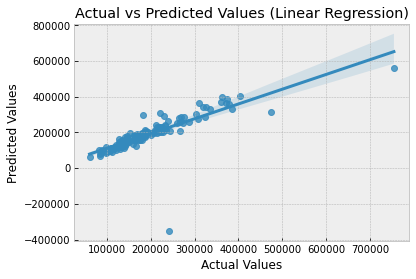

In [666]:
# Create a scatter plot with a regression line
sns.regplot(x=y_test, y=y_pred)

# Add labels and title
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values (Linear Regression)")

# Display the plot
plt.show()

In [ ]:
y_pred_n=model.predict(test)

# Ridge Regression

In [479]:
from sklearn.linear_model import Ridge
ridge_model = Ridge(alpha=1.0)

ridge_model.fit(X_train, y_train)

Ridge()

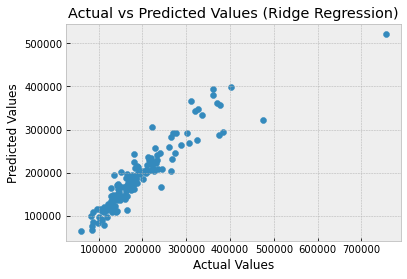

In [480]:
import matplotlib.pyplot as plt

# Make predictions on the test set
y_pred = ridge_model.predict(X_test)

# Plot actual vs predicted values
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values (Ridge Regression)")
plt.show()


# Lasso Regression

In [481]:
from sklearn.linear_model import Lasso
lasso_model = Lasso(alpha=1.0)
lasso_model.fit(X_train, y_train)


/Users/Jai/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.747e+11, tolerance: 8.060e+08
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


Lasso()

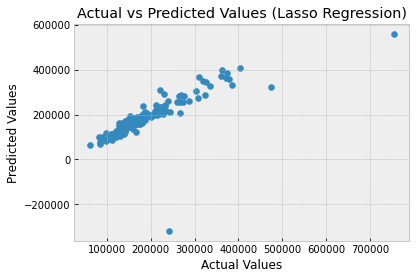

In [482]:
import matplotlib.pyplot as plt

# Make predictions on the test set
y_pred = lasso_model.predict(X_test)

# Plot actual vs predicted values
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values (Lasso Regression)")
plt.show()


# Goodness of Fit

from sklearn.metrics import mean_squared_error

# Calculate MSE on training set
mse_train = mean_squared_error(y_train, y_train_pred)

# Calculate MSE on validation set
mse_val = mean_squared_error(y_val, y_val_pred)
